In [190]:
import numpy as np
import random
import ROOT as r

In [191]:
def generate_data(probablity, trails, number_of_sets):
  rng = r.TRandom3() 
  data = []
  for i in range(number_of_sets):
    s = []
    for j in range(trails):
     number = rng.Uniform(1)
     if(number > (1-probablity)):
      s.append(1)
     else:
      s.append(0)
    s = np.array(s)
    data.append(s)

  return np.array(data)

In [192]:
data = generate_data(0.5, 100, 10000)

In [193]:
def parse(data):
  counts = []
  for i in range(data.shape[0]):
    li = data[i].tolist()
    count = li.count(1)
    counts.append(count)
  return np.array(counts)

In [194]:
counts = parse(data)
counts

array([41, 50, 52, ..., 48, 44, 45])

In [195]:
def draw(count, title):
    histogramData = r.TH1F("Stats", title, 100, 0, 100)
    for i in range(0,10000):
        histogramData.Fill(count[i])
    r.gStyle.SetOptFit(1111)
    r.gStyle.SetStatH(0.1)   
    r.gStyle.SetStatW(0.1)   
    histogramData.Draw()   
    bin_width = histogramData.GetBinWidth(1)
    integral = histogramData.Integral()
    
    if integral > 0:
        # Normalize the histogram to ensure total area is 1 (probability density)
        histogramData.Scale(1 / (integral * bin_width))
    
    # Now adjust maximum value to ensure it's in the range [0, 1]
    max_bin_content = histogramData.GetMaximum()
    
    if max_bin_content > 1:
        histogramData.Scale(1 / max_bin_content)  # Scale down so the max value is 1
    histogramData.GetXaxis().SetTitle("Counts")
    histogramData.GetYaxis().SetTitle("Probability Density")
    
    
    
    histogramData.Fit("gaus")
    histogramData.GetXaxis().SetTitle("Numbers")
    histogramData.GetYaxis().SetTitle("Probability Density")
    return histogramData


 FCN=53.2839 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=2.88849e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.00238e-02   9.82741e-04   2.88660e-06  -8.00229e-02
   2  Mean         5.04643e+01   4.98412e-02   1.79080e-04   3.77239e-04
   3  Sigma        4.95939e+00   3.52343e-02   6.92231e-06  -3.49516e-02


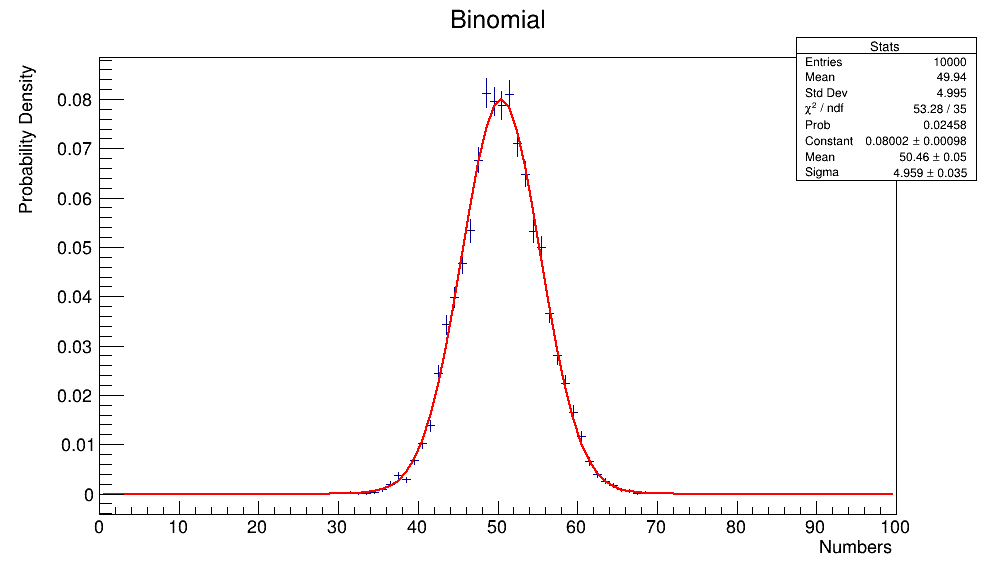

In [196]:
histogramData = draw(count=counts, title="Binomial")
 # Draw the histogram
c = r.TCanvas("c", "Canvas", 1000, 600)
histogramData.Draw()
c.Update()
c.Draw()    

In [197]:
data2 = generate_data(0.001, 1000, 10000)

 FCN=38.0689 FROM MIGRAD    STATUS=CONVERGED      85 CALLS          86 TOTAL
                     EDM=5.01941e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.87602e-01   4.65816e-03   1.18516e-05   7.23902e-02
   2  Mean         8.52421e-01   4.23781e-02   5.08012e-05  -2.32914e-04
   3  Sigma        1.39791e+00   2.68849e-02   9.33676e-06  -1.18047e-01


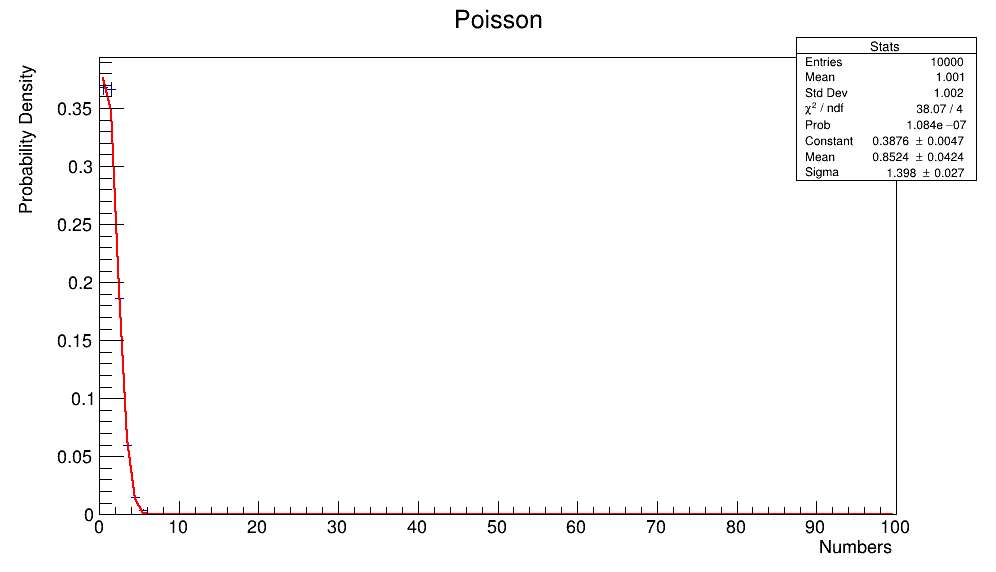

In [198]:
counts2 = parse(data2)
histogramData2 = draw(count=counts2, title="Poisson")
# Draw the histogram
c = r.TCanvas("c", "Canvas", 1000, 600)
histogramData2.Draw()
c.Update()
c.Draw()    


In [213]:
def draw2(count, title):
    histogramData = r.TH1F("Stats", title, 400, 300, 700)
    for i in range(0,10000):
        histogramData.Fill(count[i])
    r.gStyle.SetOptFit(1111)
    r.gStyle.SetStatH(0.1)   
    r.gStyle.SetStatW(0.1)   
    histogramData.Draw()   
    bin_width = histogramData.GetBinWidth(1)
    integral = histogramData.Integral()
    
    if integral > 0:
        # Normalize the histogram to ensure total area is 1 (probability density)
        histogramData.Scale(1 / (integral * bin_width))
    
    # Now adjust maximum value to ensure it's in the range [0, 1]
    max_bin_content = histogramData.GetMaximum()
    
    if max_bin_content > 1:
        histogramData.Scale(1 / max_bin_content)  # Scale down so the max value is 1
    histogramData.GetXaxis().SetTitle("Counts")
    histogramData.GetYaxis().SetTitle("Probability Density")


    histogramData.Fit("gaus")
    histogramData.GetXaxis().SetTitle("Numbers")
    histogramData.GetYaxis().SetTitle("Probability Density")
    return histogramData


In [214]:
data3 = generate_data(0.5, 1000, 10000)

 FCN=88.3475 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=1.15031e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.54852e-02   3.14091e-04   1.18148e-06   5.17293e-01
   2  Mean         5.00465e+02   1.56604e-01   7.22768e-04  -3.74273e-04
   3  Sigma        1.55265e+01   1.11787e-01   8.97992e-06   5.84317e-02


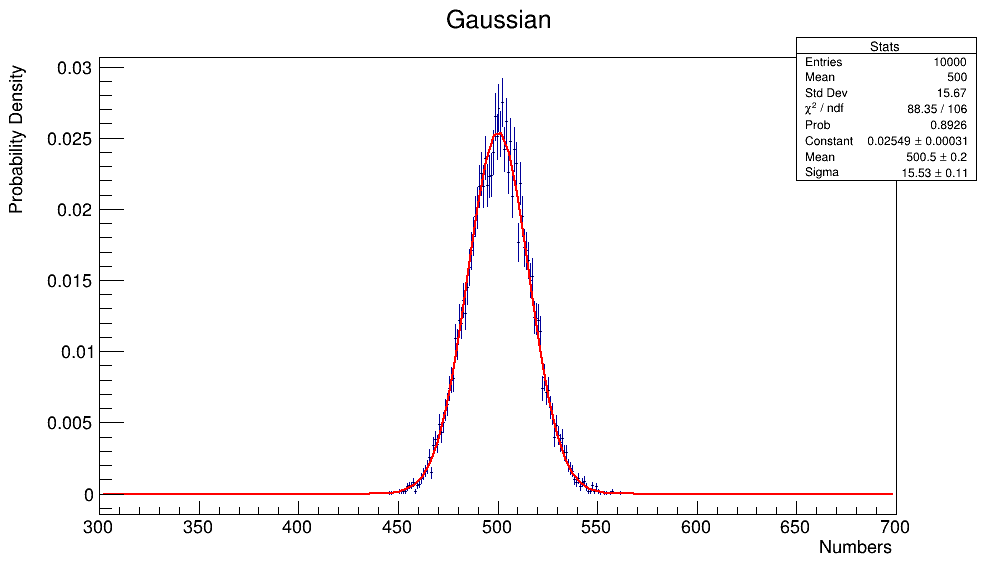

In [215]:
counts3 = parse(data3)
histogramData3 = draw2(count=counts3, title="Gaussian")
# Draw the histogram
c3 = r.TCanvas("c", "Canvas", 1000, 600)
histogramData3.Draw()
c3.Update()
c3.Draw()    